In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
len(train_data[0])

218

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

In [5]:
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
import numpy as np

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
from keras import models
from keras import layers

# Experiments

Various suggested experiments are implemented.

First a utility function is defined, that draws a grid of plots, from a history (from a model.fit()).

In [25]:
import matplotlib.pyplot as plt
def plot_history(history, title="History"):

    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(loss_values) + 1)

    fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(14, 4))
    fig.suptitle(title, fontsize=16)

    axs[0].plot(epochs, loss_values, 'bo', label='Training loss')
    axs[0].plot(epochs, val_loss_values, 'b', label='Validation loss')
    axs[0].set_title("Training and validation loss")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")
    axs[0].legend()
    axs[0].grid()

    axs[1].plot(epochs, acc, 'bo', label="Training accuracy")
    axs[1].plot(epochs, val_acc, 'b', label="Validation accuracy")
    axs[1].set_title("Training and validation accuracy")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Loss")
    axs[1].legend()
    axs[1].grid()

    plt.show()

## Original setting (2 layers)

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_2layers = model.fit(
    partial_x_train, partial_y_train,
    epochs=20, batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.5175 - accuracy: 0.7923 - val_loss: 0.3914 - val_accuracy: 0.8711
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.3116 - accuracy: 0.8977 - val_loss: 0.3081 - val_accuracy: 0.8858
Epoch 3/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.2249 - accuracy: 0.9267 - val_loss: 0.2809 - val_accuracy: 0.8910
Epoch 4/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1768 - accuracy: 0.9417 - val_loss: 0.2845 - val_accuracy: 0.8867
Epoch 5/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1446 - accuracy: 0.9550 - val_loss: 0.3001 - val_accuracy: 0.8841
Epoch 6/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1178 - accuracy: 0.9639 - val_loss: 0.2975 - val_accuracy: 0.8847
Epoch 7/20
15000/15000 [==============================] - 2s 1

## More than 2 layers

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_3layers = model.fit(
    partial_x_train, partial_y_train,
    epochs=20, batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.5558 - accuracy: 0.7724 - val_loss: 0.4272 - val_accuracy: 0.8726
Epoch 2/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.3398 - accuracy: 0.9007 - val_loss: 0.3570 - val_accuracy: 0.8584
Epoch 3/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2414 - accuracy: 0.9265 - val_loss: 0.2906 - val_accuracy: 0.8894
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1881 - accuracy: 0.9429 - val_loss: 0.2924 - val_accuracy: 0.8840
Epoch 5/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1409 - accuracy: 0.9606 - val_loss: 0.2871 - val_accuracy: 0.8853
Epoch 6/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1208 - accuracy: 0.9641 - val_loss: 0.3125 - val_accuracy: 0.8806
Epoch 7/20
15000/15000 [==============================] - 2s 10

## Only 1 middle layer

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


history_1layer = model.fit(
    partial_x_train, partial_y_train,
    epochs=20, batch_size=512,
    validation_data=(x_val, y_val)
)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.5161 - accuracy: 0.7870 - val_loss: 0.4125 - val_accuracy: 0.8573
Epoch 2/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.3301 - accuracy: 0.8987 - val_loss: 0.3267 - val_accuracy: 0.8866
Epoch 3/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.2558 - accuracy: 0.9223 - val_loss: 0.2971 - val_accuracy: 0.8859
Epoch 4/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.2097 - accuracy: 0.9355 - val_loss: 0.2812 - val_accuracy: 0.8904
Epoch 5/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1773 - accuracy: 0.9457 - val_loss: 0.2732 - val_accuracy: 0.8909
Epoch 6/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1542 - accuracy: 0.9535 - val_loss: 0.2739 - val_accuracy: 0.8893
Epoch 7/20
15000/15000 [==============================] - 2s 10

## Plots

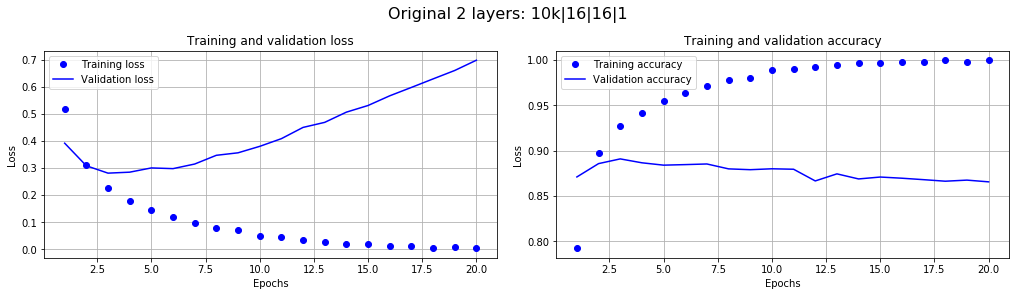

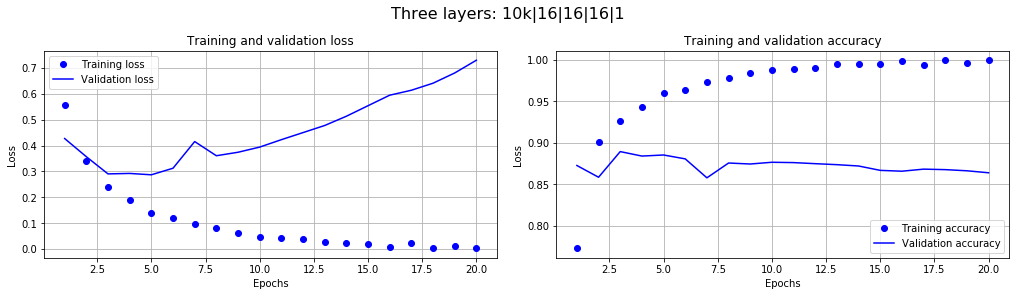

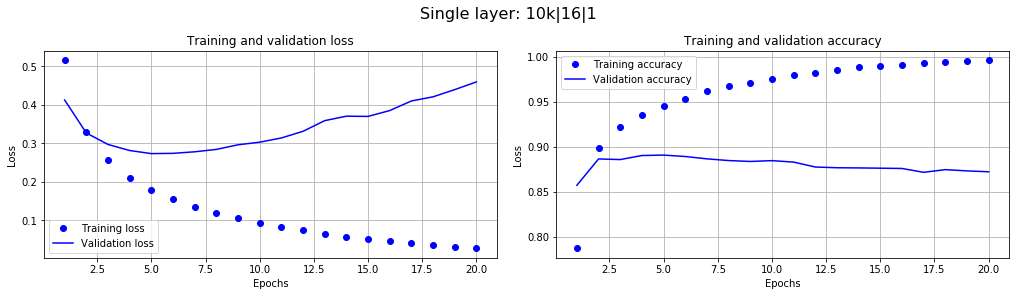

In [26]:
plot_history(history_2layers, title="Original 2 layers: 10k|16|16|1")
plot_history(history_3layers, title="Three layers: 10k|16|16|16|1")
plot_history(history_1layer, title="Single layer: 10k|16|1")

## 2 Layers with 32 hidden units

In [29]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


history_2layers32 = model.fit(
    partial_x_train, partial_y_train,
    epochs=20, batch_size=512,
    validation_data=(x_val, y_val)
)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.4952 - accuracy: 0.7751 - val_loss: 0.3461 - val_accuracy: 0.8807
Epoch 2/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.2808 - accuracy: 0.9018 - val_loss: 0.3083 - val_accuracy: 0.8782
Epoch 3/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1975 - accuracy: 0.9322 - val_loss: 0.2874 - val_accuracy: 0.8835
Epoch 4/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1581 - accuracy: 0.9435 - val_loss: 0.2808 - val_accuracy: 0.8897
Epoch 5/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1216 - accuracy: 0.9601 - val_loss: 0.2948 - val_accuracy: 0.8870
Epoch 6/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.0918 - accuracy: 0.9723 - val_loss: 0.3380 - val_accuracy: 0.8802
Epoch 7/20
15000/15000 [==============================] - 2s 1

## 2 Layers with 64 hidden units

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


history_2layers64 = model.fit(
    partial_x_train, partial_y_train,
    epochs=20, batch_size=512,
    validation_data=(x_val, y_val)
)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.4796 - accuracy: 0.7704 - val_loss: 0.3210 - val_accuracy: 0.8773
Epoch 2/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.2617 - accuracy: 0.9011 - val_loss: 0.3065 - val_accuracy: 0.8753
Epoch 3/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1888 - accuracy: 0.9307 - val_loss: 0.2783 - val_accuracy: 0.8901
Epoch 4/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1333 - accuracy: 0.9528 - val_loss: 0.2957 - val_accuracy: 0.8867
Epoch 5/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1132 - accuracy: 0.9581 - val_loss: 0.3385 - val_accuracy: 0.8807
Epoch 6/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.0740 - accuracy: 0.9765 - val_loss: 0.3459 - val_accuracy: 0.8810
Epoch 7/20
15000/15000 [==============================] - 2s 1

## 2 Layers with 64 and 32 hidden units

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


history_2layers64_32 = model.fit(
    partial_x_train, partial_y_train,
    epochs=20, batch_size=512,
    validation_data=(x_val, y_val)
)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.4867 - accuracy: 0.7673 - val_loss: 0.3292 - val_accuracy: 0.8740
Epoch 2/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.2646 - accuracy: 0.8999 - val_loss: 0.3328 - val_accuracy: 0.8599
Epoch 3/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1877 - accuracy: 0.9323 - val_loss: 0.2987 - val_accuracy: 0.8802
Epoch 4/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1423 - accuracy: 0.9497 - val_loss: 0.3032 - val_accuracy: 0.8825
Epoch 5/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1062 - accuracy: 0.9642 - val_loss: 0.3488 - val_accuracy: 0.8771
Epoch 6/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.0866 - accuracy: 0.9705 - val_loss: 0.3539 - val_accuracy: 0.8805
Epoch 7/20
15000/15000 [==============================] - 2s 1

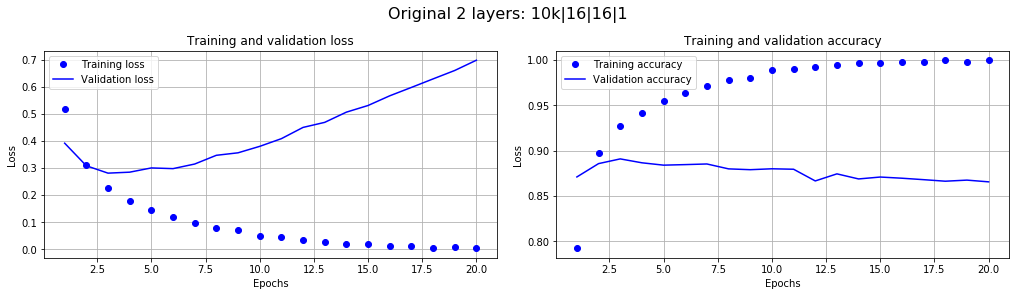

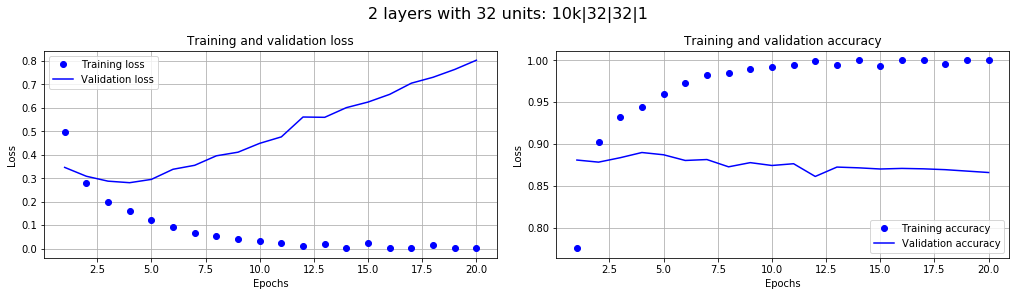

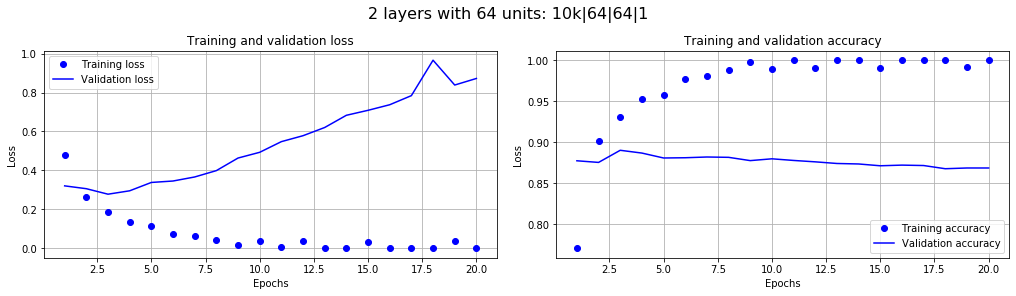

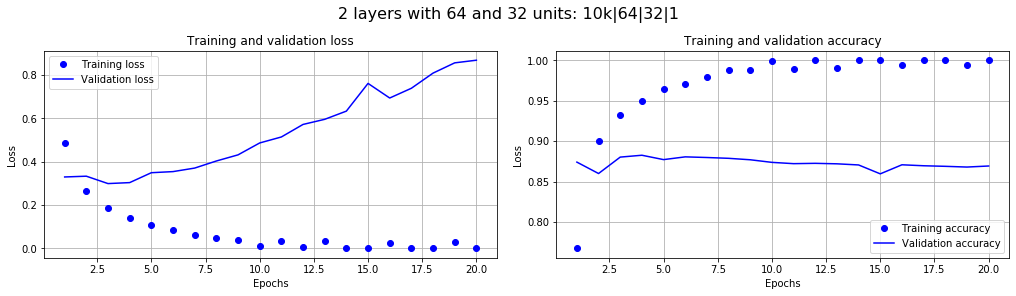

In [33]:
plot_history(history_2layers, title="Original 2 layers: 10k|16|16|1")
plot_history(history_2layers32, title="2 layers with 32 units: 10k|32|32|1")
plot_history(history_2layers64, title="2 layers with 64 units: 10k|64|64|1")
plot_history(history_2layers64_32, title="2 layers with 64 and 32 units: 10k|64|32|1")
